<a href="https://colab.research.google.com/github/CristianBR07/Challenge-Telecom-X-Analisis_de_Clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [ ]:
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

## Conociendo el DF

In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
df_temp = df.copy()
for col in df_temp.columns:
    df_temp[col] = df_temp[col].astype(str)

print("Duplicados:", df_temp.duplicated().sum())


Duplicados: 0


In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Mejorando el DF

In [ ]:
# Expandir columnas con diccionarios
df_customer = pd.json_normalize(df["customer"])
df_phone    = pd.json_normalize(df["phone"])
df_internet = pd.json_normalize(df["internet"])
df_account  = pd.json_normalize(df["account"])

# Unir todo en un solo DataFrame
df_clean = pd.concat([df[["customerID", "Churn"]],
                      df_customer, df_phone, df_internet, df_account], axis=1)

print(df_clean.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [ ]:
#Colocar los datos en minuscula
for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = df_clean[col].str.strip().str.lower()

In [ ]:

df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.4


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


## Agregando cuentas diarias

In [ ]:
df_clean["Cuentas_Diarias"] = df_clean["Charges.Monthly"] / 30
print(df_clean[["customerID", "Charges.Monthly", "Cuentas_Diarias"]].head())

   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-orfbo             65.6         2.186667
1  0003-mknfe             59.9         1.996667
2  0004-tlhlj             73.9         2.463333
3  0011-igkff             98.0         3.266667
4  0013-exchz             83.9         2.796667


## Estandarizacion

In [ ]:
df_clean.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [ ]:
df_clean

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.3,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.4,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.9,1.838333
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.7,2.836667
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [ ]:
binary_map = {"yes": 1, "no": 0}

# Aplicar a todas las columnas binarias
binary_cols = ["Churn", "Partner", "Dependents", "PhoneService",
               "PaperlessBilling", "OnlineBackup", "DeviceProtection",
               "TechSupport", "StreamingTV", "StreamingMovies"]

for col in binary_cols:
    df_clean[col] = df_clean[col].map(binary_map)

In [ ]:
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,0.0,female,0,1,1,9,1,no,dsl,...,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.3,2.186667
1,0003-mknfe,0.0,male,0,0,0,9,1,yes,dsl,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.4,1.996667
2,0004-tlhlj,1.0,male,0,0,0,4,1,no,fiber optic,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1.0,male,1,1,0,13,1,no,fiber optic,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1.0,female,1,1,0,3,1,no,fiber optic,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.4,2.796667


In [ ]:
df_clean.rename(columns={
    "Charges.Monthly": "MonthlyCharges",
    "Charges.Total": "TotalCharges"
}, inplace=True)


#📊 Carga y análisis

In [ ]:
df_clean.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.958333


/tmp/ipython-input-3485701126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df_clean, palette="pastel")


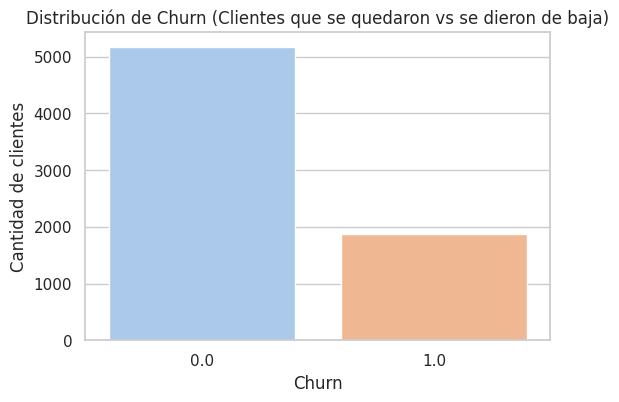

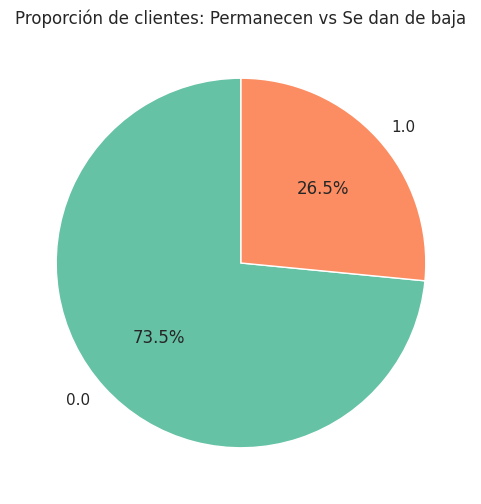

In [ ]:
# Ajustes de estilo
sns.set(style="whitegrid")

# Conteo absoluto
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df_clean, palette="pastel")
plt.title("Distribución de Churn (Clientes que se quedaron vs se dieron de baja)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()

# Proporción en gráfico circular
plt.figure(figsize=(6,6))
df_clean["Churn"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#66c2a5","#fc8d62"])
plt.title("Proporción de clientes: Permanecen vs Se dan de baja")
plt.ylabel("")
plt.show()

<Figure size 800x400 with 0 Axes>

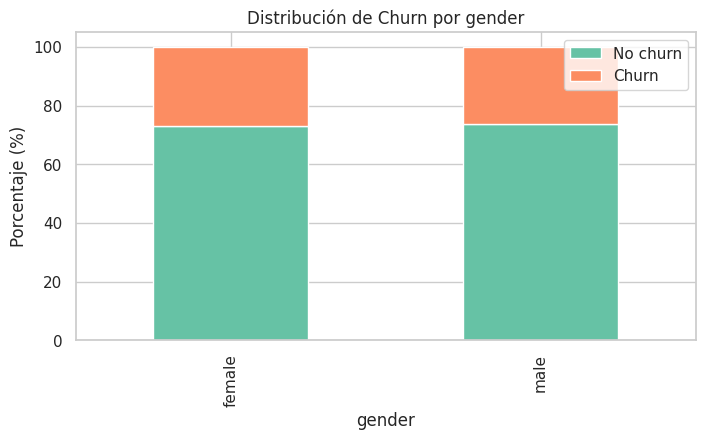

<Figure size 800x400 with 0 Axes>

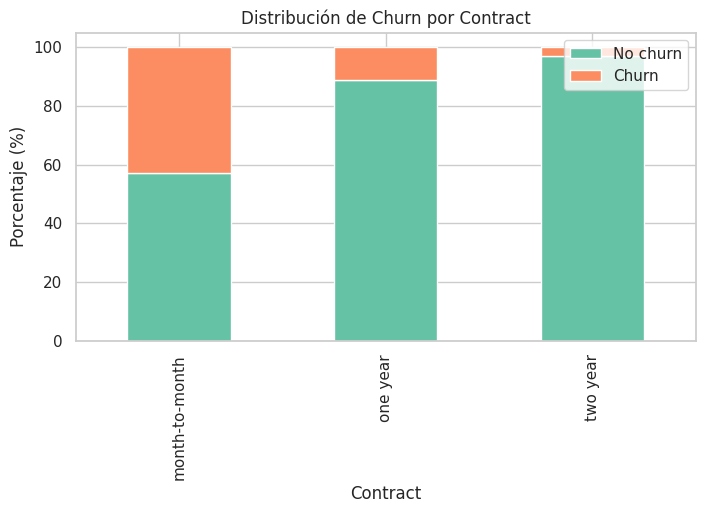

<Figure size 800x400 with 0 Axes>

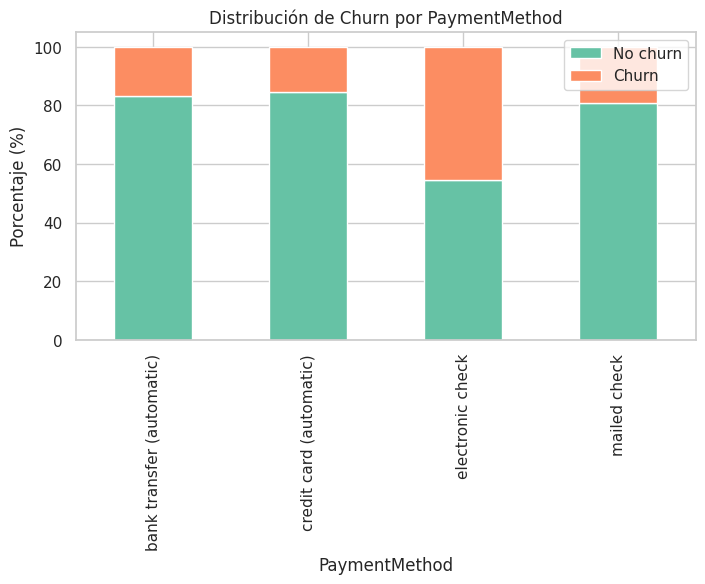

<Figure size 800x400 with 0 Axes>

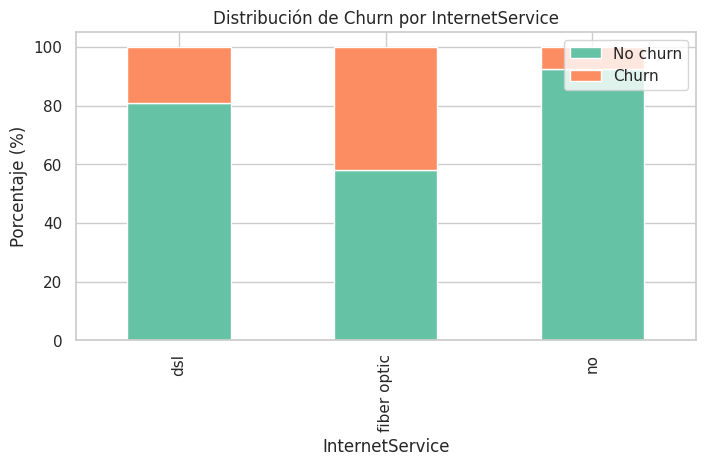

In [ ]:

sns.set(style="whitegrid")

# Lista de variables categóricas a analizar
categorical_vars = ["gender", "Contract", "PaymentMethod", "InternetService"]

for col in categorical_vars:
    plt.figure(figsize=(8,4))
    churn_dist = pd.crosstab(df_clean[col], df_clean["Churn"], normalize="index") * 100
    churn_dist.plot(kind="bar", stacked=True, color=["#66c2a5","#fc8d62"], figsize=(8,4))

    plt.title(f"Distribución de Churn por {col}")
    plt.ylabel("Porcentaje (%)")
    plt.xlabel(col)
    plt.legend(["No churn", "Churn"], loc="upper right")
    plt.show()

/tmp/ipython-input-4217994536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


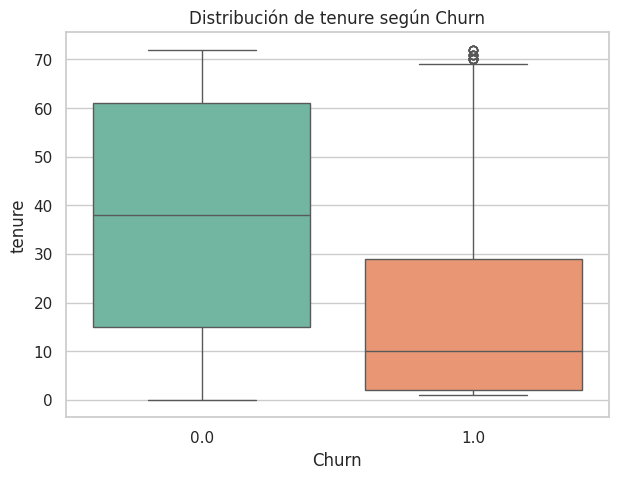

/tmp/ipython-input-4217994536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


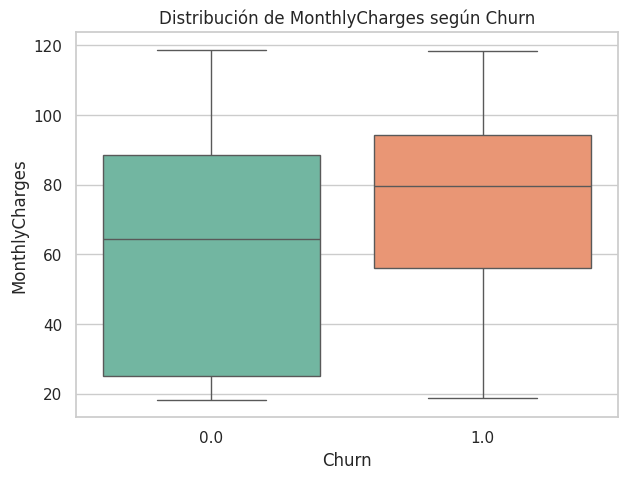

In [ ]:
numeric_vars = ["tenure", "MonthlyCharges"]

for col in numeric_vars:
    plt.figure(figsize=(7,5))
    sns.boxplot(
        x="Churn",
        y=col,
        data=df_clean,
        palette=["#66c2a5", "#fc8d62"]
    )
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

#📄Informe final

## Resultados clave

- El **contrato Month-to-Month** es el mayor predictor de evasión.  
- Métodos de pago como **Electronic Check** tienen una alta correlación con el churn.  
- Clientes con **altas tarifas mensuales** y **bajo tiempo de permanencia (tenure)** muestran mayor probabilidad de cancelar.  
- **Tenure** y **TotalCharges** son variables críticas para distinguir entre clientes leales y clientes propensos a abandonar.  

In [ ]:

df_ml = df_clean.copy()


cols_to_drop = ["customerID"]
df_ml = df_ml.drop(columns=cols_to_drop, errors="ignore")

df_ml = df_ml.loc[:, df_ml.applymap(lambda x: not isinstance(x, dict)).all(axis=0)]

df_ml.to_csv("telecomX_ml_ready.csv", index=False)

print("✅ Dataset guardado como 'telecomX_ml_ready.csv' con shape:", df_ml.shape)

/tmp/ipython-input-64564700.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ml = df_ml.loc[:, df_ml.applymap(lambda x: not isinstance(x, dict)).all(axis=0)]


✅ Dataset guardado como 'telecomX_ml_ready.csv' con shape: (7267, 21)
